In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [21]:
import os

def get_filenames(folder_path):
    filenames = []
    for filename in os.listdir(folder_path):
        if os.path.isfile(os.path.join(folder_path, filename)):
            filenames.append(filename)
    return filenames

# 使用示例
folder_path = 'simu_data/'  # 替换成你的文件夹路径
file_list = get_filenames(folder_path)

file_list.sort()
file_list


['20240102003855.txt',
 '20240102133855.txt',
 '20240102140017.txt',
 '20240102180106.txt',
 '20240103131121.txt',
 '20240103184624.txt',
 '20240104122441.txt',
 '20240104124534.txt',
 '20240104190346.txt',
 '20240107150904.txt',
 '20240107175320.txt']

In [22]:
import pandas as pd
import os

def read_files_to_dataframes(folder_path):
    dataframes = {}
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        if os.path.isfile(file_path):
            # 读取CSV文件
            df = pd.read_csv(file_path, sep='\t')
            data = pd.DataFrame()
            data[['acc_X(g)', 'acc_Y(g)', 'acc_Z(g)', 'Time']] = df[['加速度X(g)', '加速度Y(g)', '加速度Z(g)', '时间']]
            data['Time'] = pd.to_datetime(data['Time'], format='%Y-%m-%d %H:%M:%S:%f')
            # 将DataFrame存储在以文件名为键的字典中
            dataframes[filename] = data
    return dataframes

# 使用示例
folder_path = 'simu_data'  # 替换成你的文件夹路径
dfs = read_files_to_dataframes(folder_path)

# 打印每个DataFrame的信息（可选）
for filename, df in dfs.items():
    filename = filename[0:12]
    print(f"Data from {filename}:")
    print(df.head())  # 打印每个DataFrame的前几行


Data from 202401021400:
   acc_X(g)  acc_Y(g)  acc_Z(g)                    Time
0     0.247    -0.080     0.959 2024-01-02 14:00:17.967
1     0.247    -0.092     0.951 2024-01-02 14:00:17.967
2     0.240    -0.092     0.951 2024-01-02 14:00:18.890
3     0.240    -0.089     0.957 2024-01-02 14:00:18.890
4     0.233    -0.089     0.957 2024-01-02 14:00:18.154
Data from 202401041224:
   acc_X(g)  acc_Y(g)  acc_Z(g)                    Time
0    -0.005     0.001     0.998 2024-01-04 12:24:41.944
1    -0.005     0.002     0.996 2024-01-04 12:24:42.350
2    -0.006     0.002     0.997 2024-01-04 12:24:42.155
3    -0.006     0.001     0.996 2024-01-04 12:24:42.212
4    -0.006     0.002     0.997 2024-01-04 12:24:42.338
Data from 202401031846:
   acc_X(g)  acc_Y(g)  acc_Z(g)                    Time
0    -0.013    -0.005     0.998 2024-01-03 18:46:24.575
1    -0.012    -0.005     0.997 2024-01-03 18:46:24.668
2    -0.012    -0.004     0.998 2024-01-03 18:46:24.788
3    -0.012    -0.005     0.998 

In [30]:
# 根据键排序
sorted_items = sorted(dfs.items())

# 创建一个新的有序字典
sorted_dfs = {k: v for k, v in sorted_items}

sorted_dfs.keys()

dict_keys(['20240102003855.txt', '20240102133855.txt', '20240102140017.txt', '20240102180106.txt', '20240103131121.txt', '20240103184624.txt', '20240104122441.txt', '20240104124534.txt', '20240104190346.txt', '20240107150904.txt', '20240107175320.txt'])

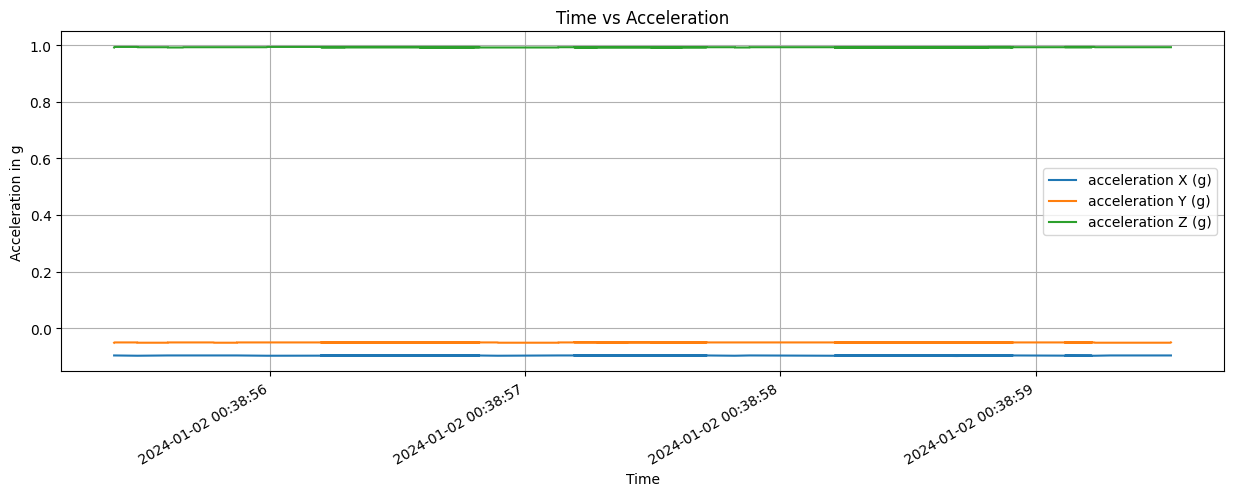

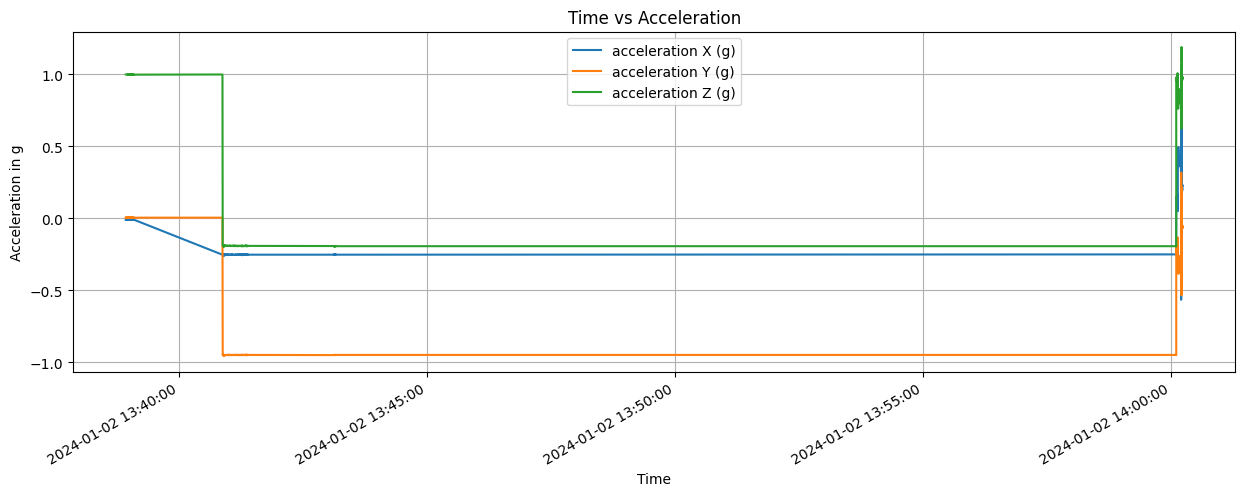

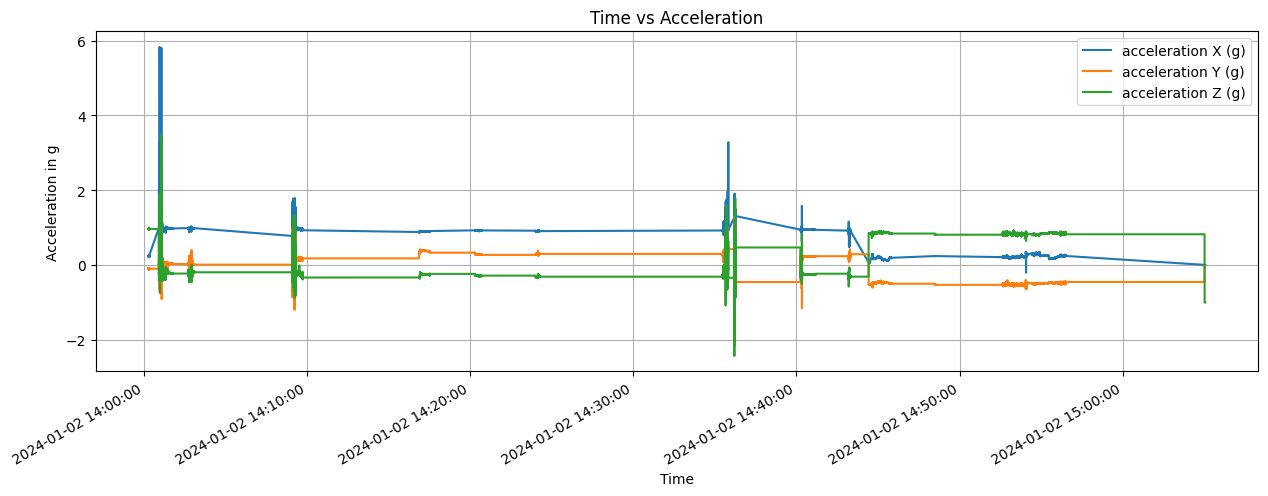

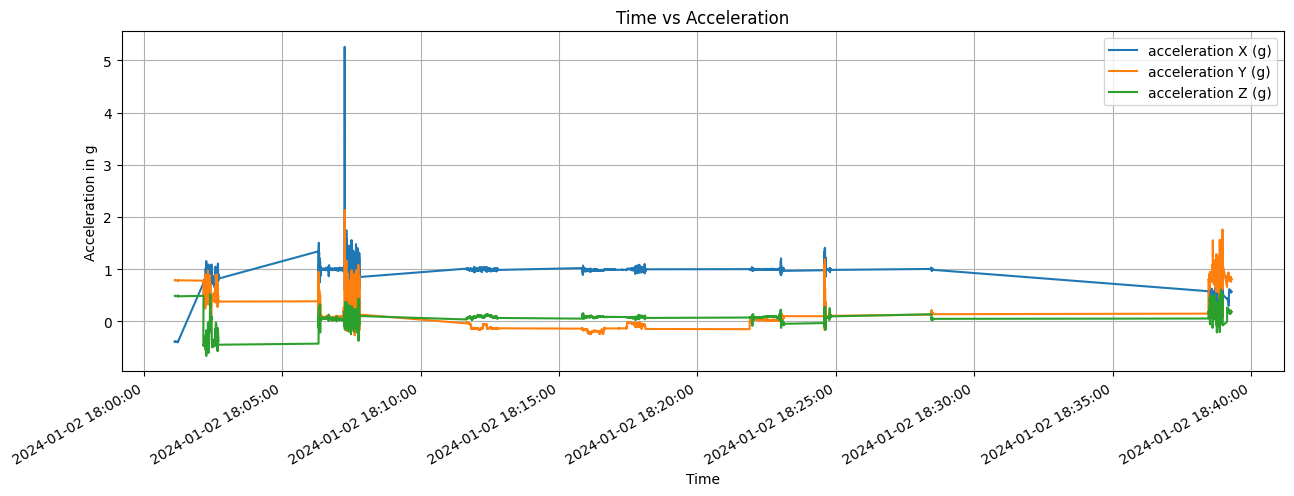

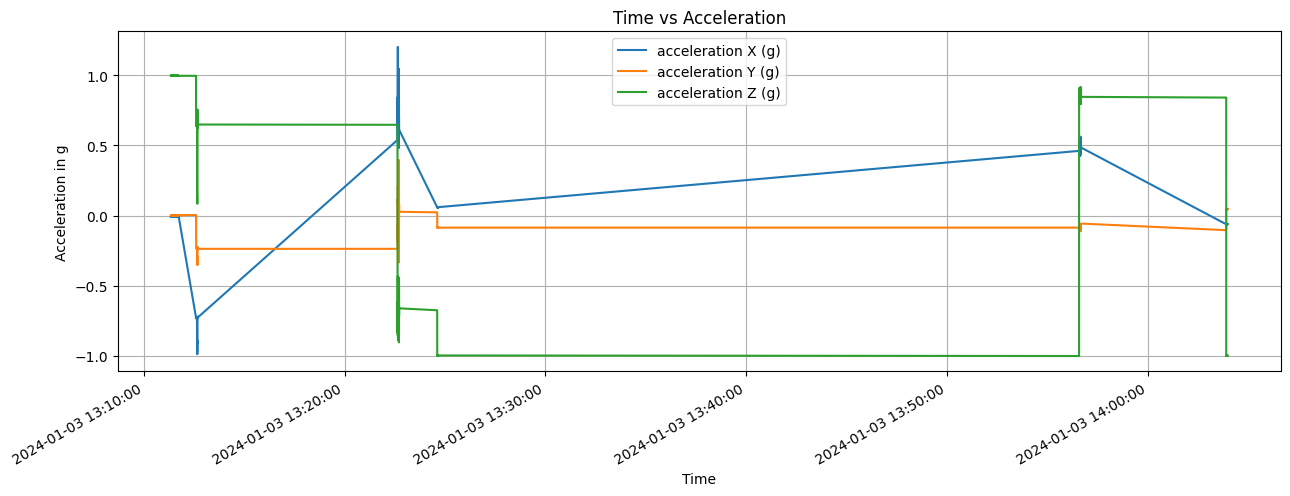

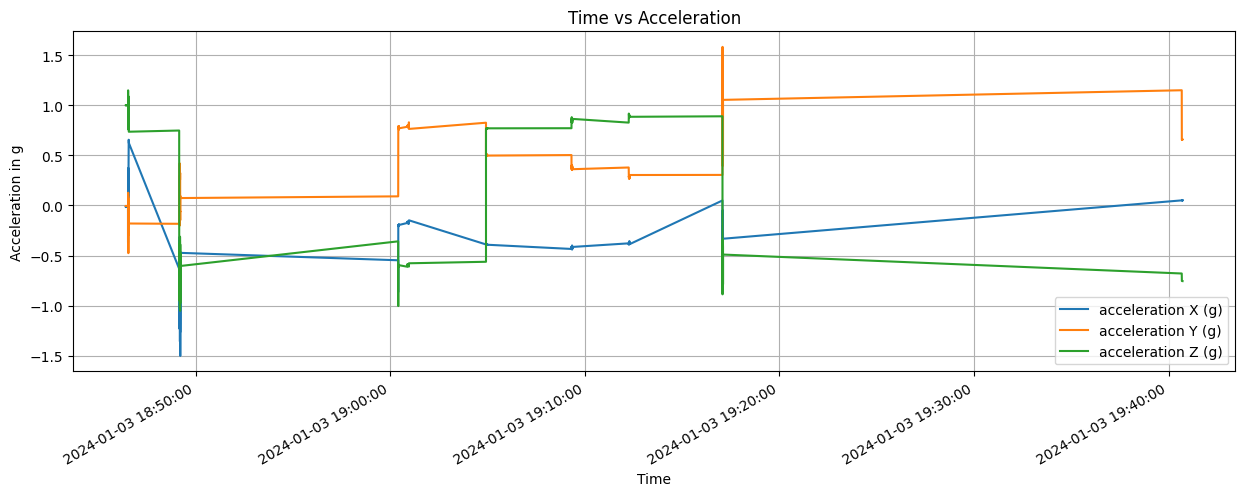

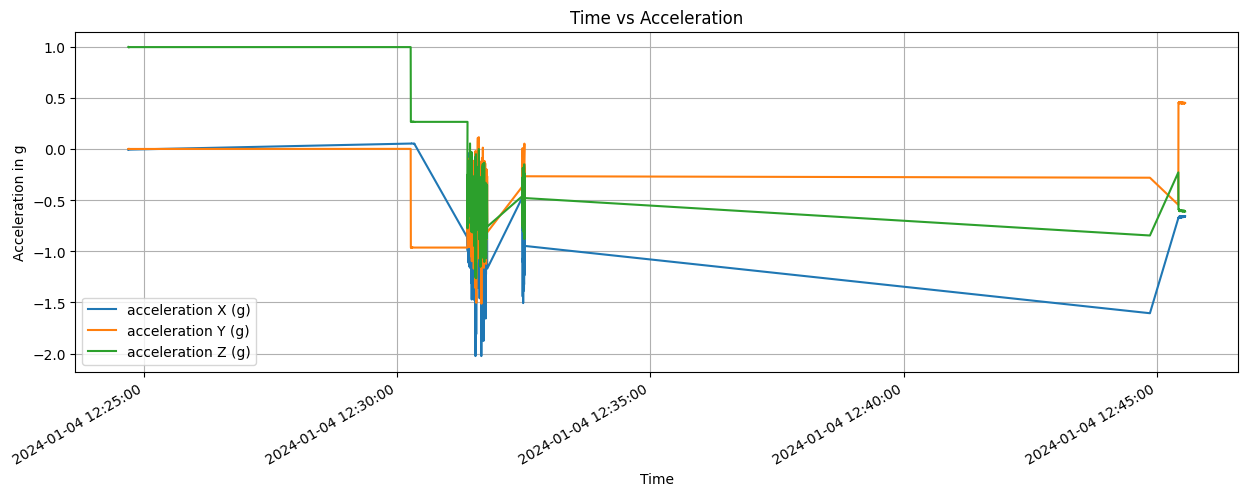

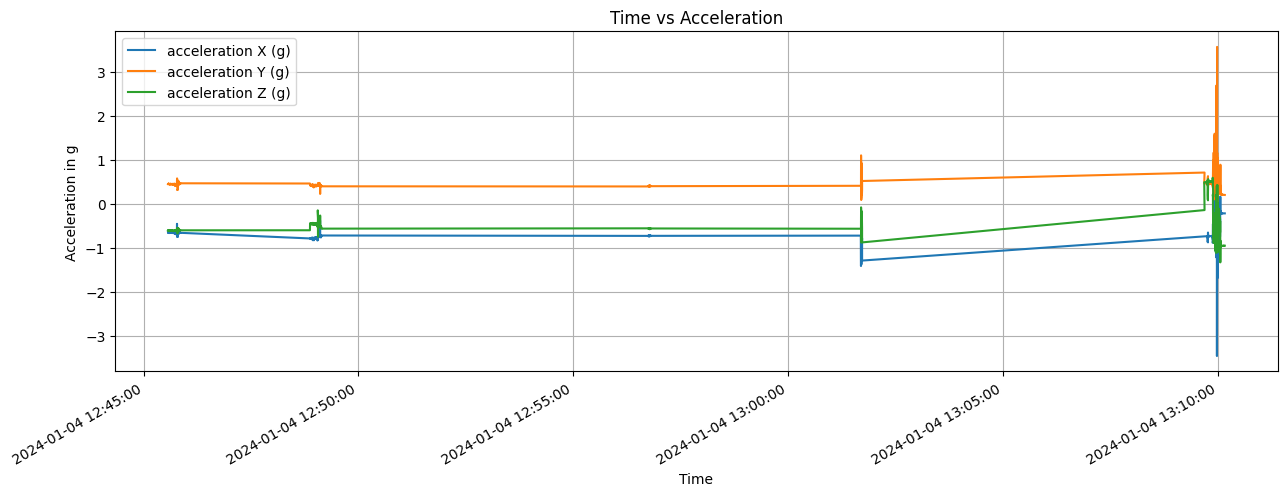

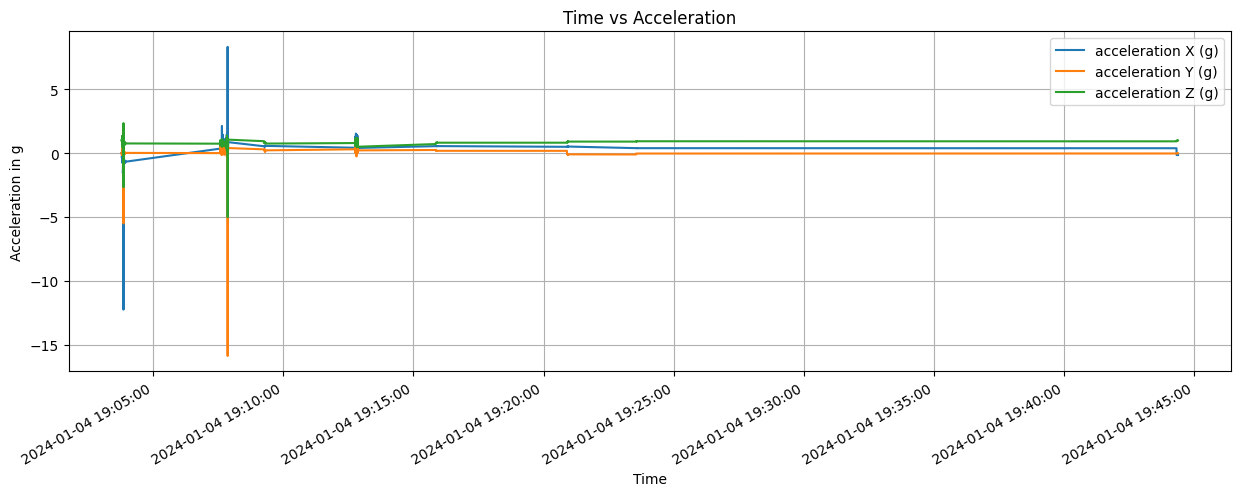

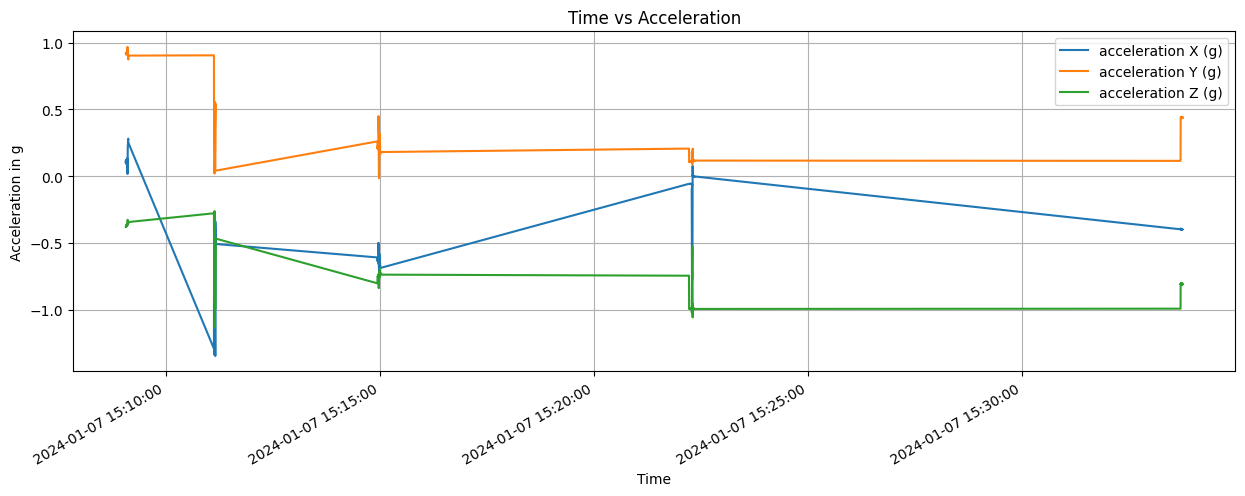

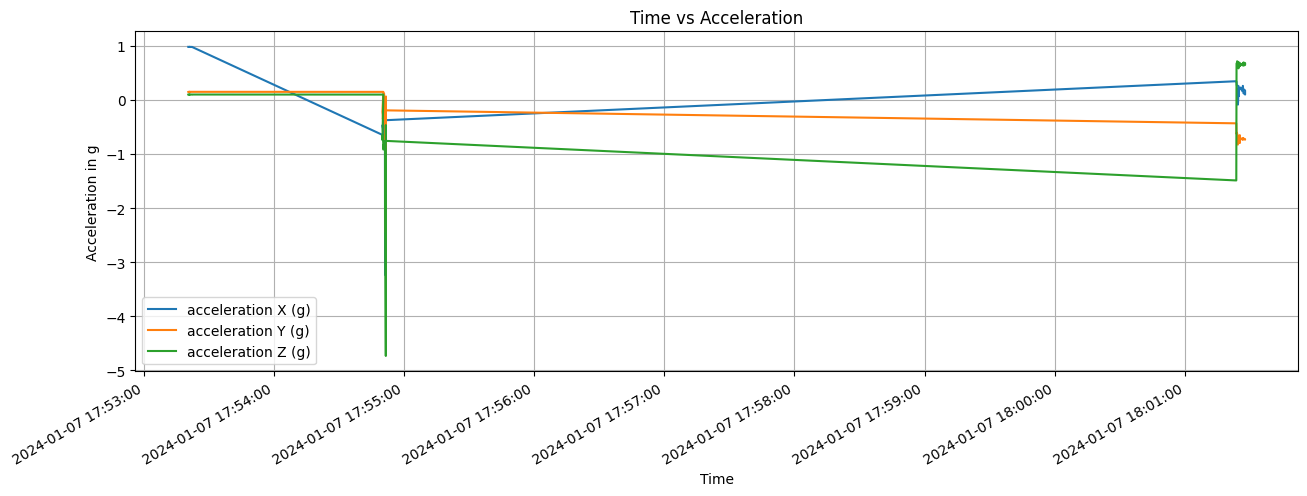

In [38]:
for filename, df in sorted_dfs.items():
    filename = filename[0:12]

    # Re-plotting
    plt.figure(figsize=(15, 5))

    #df.plot(x='Time', y=['acc_X(g)', 'acc_Y(g)', 'acc_Z(g)'], title=filename)

    # Plotting each acceleration component
    plt.plot(df['Time'], df['acc_X(g)'], label='acceleration X (g)')
    plt.plot(df['Time'], df['acc_Y(g)'], label='acceleration Y (g)')
    plt.plot(df['Time'], df['acc_Z(g)'], label='acceleration Z (g)')


    # Formatting the plot
    plt.xlabel('Time')
    plt.ylabel('Acceleration in g')
    plt.title('Time vs Acceleration')
    plt.legend()
    plt.grid(True)

    # Improve date formatting on x-axis
    plt.gcf().autofmt_xdate() # Auto format for better date representation
    myFmt = mdates.DateFormatter('%Y-%m-%d %H:%M:%S')
    plt.gca().xaxis.set_major_formatter(myFmt)


    plt.show()

In [24]:
for filename, df in dfs.items():
    print(f"Data from {filename}:")
    print(df.shape)

Data from 20240102140017.txt:
(11934, 4)
Data from 20240104122441.txt:
(420, 4)
Data from 20240103184624.txt:
(353, 4)
Data from 20240103131121.txt:
(471, 4)
Data from 20240107150904.txt:
(206, 4)
Data from 20240102180106.txt:
(4640, 4)
Data from 20240102003855.txt:
(84, 4)
Data from 20240104124534.txt:
(1346, 4)
Data from 20240104190346.txt:
(505, 4)
Data from 20240107175320.txt:
(68, 4)
Data from 20240102133855.txt:
(581, 4)


In [25]:
# 使用pd.concat()合并所有DataFrame
combined_df = pd.concat(dfs.values(), ignore_index=True)

combined_df.shape

(20608, 4)